<a href="https://colab.research.google.com/github/srikanth2102/IPL_SCORE_PREDICTION/blob/main/Hyper_parameter_fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IPL SCORE PREDICTION

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
#uploading the file in the device to google colab
from google.colab import files
uploaded = files.upload()

In [ ]:
#Reading File using Pandas
ipl =pd.read_csv("data.csv")
print(ipl.shape)
ipl.head()

(76014, 15)


,mid,date,venue,batting_team,bowling_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [ ]:
#cleaning data
ipl.drop(['mid','date','batsman','bowler','striker','non-striker'],axis=1,inplace=True)
print(ipl.shape)
ipl.head()

(76014, 9)


,venue,batting_team,bowling_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [ ]:
#veiwing unique values in venue and battting_team
print(ipl['venue'].unique())
ipl['batting_team'].unique()
ipl['count'] = 1
ipl.groupby(['venue']).count()['count']

['M Chinnaswamy Stadium' 'Punjab Cricket Association Stadium, Mohali'
 'Feroz Shah Kotla' 'Wankhede Stadium' 'Eden Gardens'
 'Sawai Mansingh Stadium' 'Rajiv Gandhi International Stadium, Uppal'
 'MA Chidambaram Stadium, Chepauk' 'Dr DY Patil Sports Academy' 'Newlands'
 "St George's Park" 'Kingsmead' 'SuperSport Park' 'Buffalo Park'
 'New Wanderers Stadium' 'De Beers Diamond Oval' 'OUTsurance Oval'
 'Brabourne Stadium' 'Sardar Patel Stadium, Motera' 'Barabati Stadium'
 'Vidarbha Cricket Association Stadium, Jamtha'
 'Himachal Pradesh Cricket Association Stadium' 'Nehru Stadium'
 'Holkar Cricket Stadium'
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'
 'Subrata Roy Sahara Stadium'
 'Shaheed Veer Narayan Singh International Stadium'
 'JSCA International Stadium Complex' 'Sheikh Zayed Stadium'
 'Sharjah Cricket Stadium' 'Dubai International Cricket Stadium'
 'Maharashtra Cricket Association Stadium'
 'Punjab Cricket Association IS Bindra Stadium, Mohali'
 'Saurashtra Cricket Associa

venue
Barabati Stadium                                         856
Brabourne Stadium                                       1380
Buffalo Park                                             380
De Beers Diamond Oval                                    368
Dr DY Patil Sports Academy                              2088
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     1113
Dubai International Cricket Stadium                      868
Eden Gardens                                            7049
Feroz Shah Kotla                                        7068
Green Park                                               492
Himachal Pradesh Cricket Association Stadium            1115
Holkar Cricket Stadium                                   617
JSCA International Stadium Complex                       837
Kingsmead                                               1731
M Chinnaswamy Stadium                                   7443
MA Chidambaram Stadium, Chepauk                         5972
Maharashtra Cricke

In [ ]:
#retainig the current teams alone(2021)
current_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Sunrisers Hyderabad']
current_venues = ['M Chinnaswamy Stadium','Eden Gardens', 'Feroz Shah Kotla', 'MA Chidambaram Stadium, Chepauk',
       'Punjab Cricket Association Stadium, Mohali', 
       'Wankhede Stadium', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal']
ipl = ipl[(ipl['batting_team'].isin(current_teams)) &(ipl['bowling_team'].isin(current_teams))]
ipl = ipl[(ipl['venue'].isin(current_venues))]
ipl = ipl[ipl['overs']>=5.0]
ipl.head()

,venue,batting_team,bowling_team,runs,wickets,overs,runs_last_5,wickets_last_5,total,count
32,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222,1
33,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222,1
34,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222,1
35,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222,1
36,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222,1


In [ ]:
#creating dummies for categorical data
final_ipl = pd.get_dummies(data=ipl, columns=['batting_team', 'bowling_team', 'venue'])
final_ipl.head()

,runs,wickets,overs,runs_last_5,wickets_last_5,total,count,batting_team_Chennai Super Kings,batting_team_Delhi Daredevils,batting_team_Kings XI Punjab,batting_team_Kolkata Knight Riders,batting_team_Mumbai Indians,batting_team_Rajasthan Royals,batting_team_Royal Challengers Bangalore,batting_team_Sunrisers Hyderabad,bowling_team_Chennai Super Kings,bowling_team_Delhi Daredevils,bowling_team_Kings XI Punjab,bowling_team_Kolkata Knight Riders,bowling_team_Mumbai Indians,bowling_team_Rajasthan Royals,bowling_team_Royal Challengers Bangalore,bowling_team_Sunrisers Hyderabad,venue_Eden Gardens,venue_Feroz Shah Kotla,venue_M Chinnaswamy Stadium,"venue_MA Chidambaram Stadium, Chepauk","venue_Punjab Cricket Association Stadium, Mohali","venue_Rajiv Gandhi International Stadium, Uppal",venue_Sawai Mansingh Stadium,venue_Wankhede Stadium
32,61,0,5.1,59,0,222,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
33,61,1,5.2,59,1,222,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
34,61,1,5.3,59,1,222,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
35,61,1,5.4,59,1,222,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
36,61,1,5.5,58,1,222,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [ ]:
#rearranging the feature columns 
final_ipl = final_ipl[['batting_team_Chennai Super Kings', 'batting_team_Delhi Daredevils',
       'batting_team_Kings XI Punjab', 'batting_team_Kolkata Knight Riders',
       'batting_team_Mumbai Indians', 'batting_team_Rajasthan Royals',
       'batting_team_Royal Challengers Bangalore', 'batting_team_Sunrisers Hyderabad',
       'bowling_team_Chennai Super Kings', 'bowling_team_Delhi Daredevils',
       'bowling_team_Kings XI Punjab', 'bowling_team_Kolkata Knight Riders',
       'bowling_team_Mumbai Indians', 'bowling_team_Rajasthan Royals',
       'bowling_team_Royal Challengers Bangalore',
       'bowling_team_Sunrisers Hyderabad', 'venue_Eden Gardens',
       'venue_Feroz Shah Kotla','venue_M Chinnaswamy Stadium',
       'venue_MA Chidambaram Stadium, Chepauk','venue_Sawai Mansingh Stadium',
       'venue_Punjab Cricket Association Stadium, Mohali',
       'venue_Rajiv Gandhi International Stadium, Uppal',
       'venue_Wankhede Stadium', 'overs','runs', 'wickets', 'runs_last_5', 'wickets_last_5',
       ]]
target=ipl['total']
final_ipl.head()

,batting_team_Chennai Super Kings,batting_team_Delhi Daredevils,batting_team_Kings XI Punjab,batting_team_Kolkata Knight Riders,batting_team_Mumbai Indians,batting_team_Rajasthan Royals,batting_team_Royal Challengers Bangalore,batting_team_Sunrisers Hyderabad,bowling_team_Chennai Super Kings,bowling_team_Delhi Daredevils,bowling_team_Kings XI Punjab,bowling_team_Kolkata Knight Riders,bowling_team_Mumbai Indians,bowling_team_Rajasthan Royals,bowling_team_Royal Challengers Bangalore,bowling_team_Sunrisers Hyderabad,venue_Eden Gardens,venue_Feroz Shah Kotla,venue_M Chinnaswamy Stadium,"venue_MA Chidambaram Stadium, Chepauk",venue_Sawai Mansingh Stadium,"venue_Punjab Cricket Association Stadium, Mohali","venue_Rajiv Gandhi International Stadium, Uppal",venue_Wankhede Stadium,overs,runs,wickets,runs_last_5,wickets_last_5
32,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,5.1,61,0,59,0
33,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,5.2,61,1,59,1
34,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,5.3,61,1,59,1
35,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,5.4,61,1,59,1
36,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,5.5,61,1,58,1


In [ ]:
#Spliting data into Training, Validation, Testing sets(0.6, 0.2, 0.2)
X_train, X_dummy, Y_train, Y_dummy = train_test_split(final_ipl, target, test_size=0.4)
X_test, X_val, Y_test, Y_val =train_test_split(X_dummy, Y_dummy, test_size=0.5)
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(17164, 29)
(5722, 29)
(5722, 29)


In [147]:
#Creating a dictionary to store performance of different models
models=dict()

**LINEAR REGRESSION**

In [105]:
#LinearRegression
from sklearn.linear_model import LinearRegression

#model fitting
lin_reg= LinearRegression()
lin_reg.fit(X_train,Y_train)

#predicting validation set
Y_val_lin_reg = lin_reg.predict(X_val)

#importing metrics to find score
from sklearn import metrics

#calculating score of training data
train_score_lin_reg = str(lin_reg.score(X_train,Y_train) * 100)
print("score on train data :",train_score_lin_reg)

#calculating score of validation data
val_score_lin_reg = str(lin_reg.score(X_val,Y_val) * 100)
print("score on  validation data :",val_score_lin_reg)

score on train data : 67.23787871604989
score on  validation data : 67.56111943900378


In [148]:
#adding the score in the dictionary
models['lin_reg']=val_score_lin_reg

SUPPORT VECTOR MACHINE

In [106]:
#importing SVR(support vector regression)
from sklearn.svm import SVR

#model fitting
svm=SVR(kernel='linear')
svm.fit(X_train,Y_train)

#predicting validation set
svm.predict(X_val)

#calculating score of training
train_score_svm = str(svm.score(X_train,Y_train) * 100)
print("score on train data :",train_score_svm)

#calculating score of validation
val_score_svm = str(svm.score(X_val,Y_val) * 100)
print("score on val data :",val_score_svm)

score on train data : 66.26439065788703
score on val data : 66.74328882253774


In [149]:
#adding score in the dictionary
models['svm']=val_score_svm

**DECISION TREE**

In [108]:
#importing Decision Tree
from sklearn.tree import DecisionTreeRegressor

#model fitting
tree = DecisionTreeRegressor(max_depth=40)
tree.fit(X_train, Y_train)

#predicting the validation data
tree.predict(X_val)

#calculating score of training data
train_score_tree = str(tree.score(X_train,Y_train) * 100)
print("score on train data :",train_score_tree)

#calulating score of validation data
val_score_tree = str(tree.score(X_val,Y_val) * 100)
print("score on validation data :",val_score_tree)

score on train data : 99.99372832205916
score on validation data : 88.64431775721027


In [150]:
#adding validation data score in the dictionary
models['tree']=test_score_tree

**BOSTING(USING DECISION TREE)**

In [110]:
#importing Bosting(using decision tree)
from sklearn.ensemble import GradientBoostingRegressor

#fitting model
boost = GradientBoostingRegressor(random_state=0,n_estimators=5000,learning_rate=0.5)
boost.fit(X_train,Y_train)

#predicting the validation data
boost.predict(X_val)

#calculating score of training data
train_score_boost = str(boost.score(X_train,Y_train) * 100)
print("score on train data :",train_score_boost)

#calculating score of validation data
val_score_boost = str(boost.score(X_val,Y_val) * 100)
print("score on validation data :",val_score_boost)

score on train data : 98.04668703378762
score on validation data : 92.14739453454546


In [151]:
#adding validation data to the dictionary
models['boosting']=test_score_boost

**RANDOM FOREST REGRESSION**

In [163]:
#importing RandomForest
from sklearn.ensemble import RandomForestRegressor

#model fitting
random_forest = RandomForestRegressor(max_depth=40, n_estimators=1000)
random_forest.fit(X_train,Y_train)

# predicting validation set
Y_pred_random=random_forest.predict(X_test)


#calculating score of training data
train_score_random = str(random_forest.score(X_train,Y_train) * 100)
print("score on train data :",train_score_random)

#calculating score of validation data
val_score_forest = str(random_forest.score(X_val,Y_val) * 100)
print("score on test data :",val_score_forest)

score on train data : 99.32840807007726
score on test data : 94.87913428639484


In [165]:
#adding validation score in the dictionary
models['forest']=val_score_forest
models

{'MLP': '92.14739453454546',
 'boosting': '92.14739453454546',
 'forest': '94.87913428639484',
 'lin_reg': '67.56111943900378',
 'svm': '66.74328882253774',
 'tree': '88.2275065033608'}

In [116]:
#importing MLP Regressor(neural network)
from sklearn.neural_network import MLPRegressor

#model fitting
mlp=MLPRegressor(activation='relu', hidden_layer_sizes=(60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60),alpha=0.01,max_iter=1000)
mlp.fit(X_train,Y_train)

#predicting validation set
mlp.predict(X_val)

#calculating score of training data
train_score_mlp = str(mlp.score(X_train,Y_train) * 100)
print("score on training data :",train_score_mlp)

##calculating score of validation data
val_score_mlp = str(mlp.score(X_val,Y_val) * 100)
print("score on validation data :",val_score_mlp)

score on training data : 95.24152770177238
score on validation data : 94.08770227168527


In [154]:
#adding validation score in the dictionary
models['MLP']=test_score_reg

In [167]:
models

{'MLP': '92.14739453454546',
 'boosting': '92.14739453454546',
 'forest': '94.87913428639484',
 'lin_reg': '67.56111943900378',
 'svm': '66.74328882253774',
 'tree': '88.2275065033608'}

In [166]:
#selecting the best model
best_model_score=0
for i in models.keys():
  if(float(models[i])>float(best_model_score)):
    best_model_score=models[i]
    best_model=i
print(best_model,best_model_score)

forest 94.87913428639484


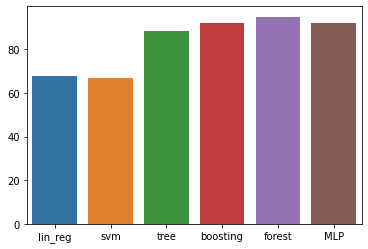

In [168]:
#representing the score of all models 
from seaborn import barplot
model_names = list(models.keys())
accuracy = list(map(float, models.values()))
barplot(x=model_names,y=accuracy)

From the above bar plot we can see that forest is the clear winner in terms of score. Also the random forest is faster compared to the runner up i.e neural network(MLP). If our aim to have faster result than a precise result we can lean over to Decision tree since it way faster than random forest and gives a pretty decent score.

In [169]:
#testing the best model in our testing data
Y_pred=random_forest.predict(X_test)
print(Y_test)
print(Y_pred)
val_score_forest = str(random_forest.score(X_test,Y_test) * 100)
print("score on test data :",val_score_forest)

4841      67
63243    191
43560    174
35293    177
54838    163
        ... 
45039    154
41531    123
43576    174
33888    156
34387    139
Name: total, Length: 5722, dtype: int64
[ 88.292 186.666 169.614 ... 167.432 159.006 142.826]
score on test data : 94.17644014995088


To make the prediction on test data we here used the Random Forest as we want the prediction of the score to be more precise rather than a mediocre fast prediction.